# 00. PyTorch Fundamentals
Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

If you have a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.0+cu118


## Introduction to Tensors
### Creating tensors
PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

In [2]:
# Scalar 
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
# Get tensor back as Python int
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 1])
vector

tensor([7, 1])

In [6]:
vector.shape

torch.Size([2])

In [7]:
vector.ndim

1

In [8]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX[1]

tensor([ 9, 10])

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])

TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
TENSOR.ndim

3

In [14]:
TENSOR.shape

torch.Size([1, 3, 3])

In [15]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random tensors
Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

> Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [16]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.6644, 0.0426, 0.3324, 0.5166],
        [0.3845, 0.0557, 0.0444, 0.9269],
        [0.2804, 0.3440, 0.4993, 0.3629]])

In [17]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, colour channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

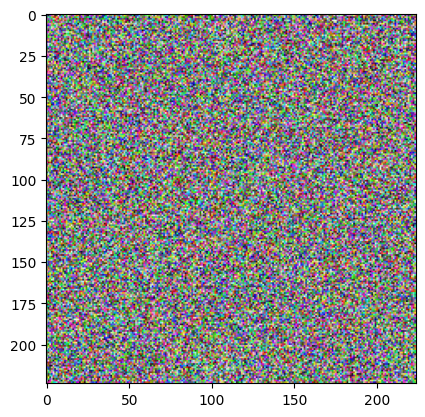

In [18]:
plt.imshow(random_image_size_tensor)

### Zeros and ones

In [19]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [20]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [21]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [22]:
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes
Note: Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [24]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor 

tensor([3., 6., 9.])

In [25]:
float_32_tensor.dtype

torch.float32

In [26]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [27]:
int_32_tensor = torch.tensor([3,4,2], dtype=torch.long)
int_32_tensor

tensor([3, 4, 2])

In [28]:
float_32_tensor * int_32_tensor

tensor([ 9., 24., 18.])

### Getting information from tensors (tensor attributes)
1. Tensors not right datatype - to do get datatype from a tensor, can use tensor.dtype
2. Tensors not right shape - to get shape from a tensor, can use tensor.shape
3. Tensors not on the right device - to get device from a tensor, can use tensor.device

In [29]:
# Create a tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.8681, 0.7579, 0.1502, 0.3849],
        [0.3276, 0.1348, 0.2107, 0.8823],
        [0.5480, 0.4458, 0.5881, 0.0994]])

In [30]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.8681, 0.7579, 0.1502, 0.3849],
        [0.3276, 0.1348, 0.2107, 0.8823],
        [0.5480, 0.4458, 0.5881, 0.0994]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


## Manipulating Tensors (tensor operations)
Tensor opertions include:

* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [31]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [32]:
# Multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [33]:
# Substract 10
tensor - 10

tensor([-9, -8, -7])

In [34]:
# Try out PyTorch in-built functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [35]:
torch.add(tensor, 10)

tensor([11, 12, 13])

### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:
1. Element-wise multiplication
2. Matrix mutliplication (dot product)

More information on multiplying matrices - https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix mutliplication needs to satisfy:

The **inner dimensions** must match:
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work

The resulting matrix has the shape of the **outer dimensions**:
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

In [36]:
# Element wise multiplication
print(tensor, "*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [37]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [38]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3

14

In [39]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 504 µs, sys: 77 µs, total: 581 µs
Wall time: 563 µs


In [40]:
%%time
tensor @ tensor

CPU times: user 94 µs, sys: 0 ns, total: 94 µs
Wall time: 97 µs


tensor(14)

In [41]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 44 µs, sys: 6 µs, total: 50 µs
Wall time: 54.6 µs


tensor(14)

### One of the most common errors in deep learning: shape errors

In [42]:
# Shapes for matrix multiplication 
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])


tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [43]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [44]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [45]:
# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Tensor Aggregation


### Finding the min, max, mean, sum, etc (tensor aggregation)

In [46]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [47]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [48]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [49]:
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [50]:
torch.sum(x), x.sum()

(tensor(450), tensor(450))

### Finding the positional min and max

In [51]:
# Find the position in tensor that has the minimum value with argmin() -> returns index position of targt tensor where the minimum value occurs 
x.argmin()

tensor(0)

In [52]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

In [53]:
x[9]

tensor(90)

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [54]:
# Let's create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [55]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [56]:
# Change the view 
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [57]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [58]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [59]:
x_stacked = torch.stack([x,x,x,x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [60]:
# torch.squeeze() - removes all single dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [61]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")


Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [62]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}") 
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy.

In [63]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [64]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [65]:
# Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [66]:
# Let's index on the most inner bracket (last dimension)
x[0][1][1]

tensor(5)

In [67]:
# You can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [68]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [69]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [70]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [71]:
# Index on x to return 9
print(x[0][2][2])

# Index on x to return 3, 6, 9
print(x[:, :, 2])

tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors & NumPy
NumPy is a popular scientific Python numerical computing library.

And because of this, PyTorch has functionality to interact with it.

* Data in NumPy, want in PyTorch tensor -> torch.from_numpy(ndarray)
* PyTorch tensor -> NumPy -> torch.Tensor.numpy()

In [72]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [73]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [74]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducbility (trying to take random out of random)

In short how a neural network learns:

> start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...

To reduce the randomness in neural networks and PyTorch comes the concept of a random seed.

Essentially what the random seed does is "flavour" the randomness.

In [75]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8785, 0.2527, 0.7042, 0.3491],
        [0.8580, 0.9188, 0.9706, 0.5257],
        [0.0724, 0.4132, 0.6037, 0.8094]])
tensor([[0.2500, 0.6970, 0.9065, 0.9748],
        [0.7266, 0.7172, 0.6015, 0.5132],
        [0.5258, 0.7787, 0.0325, 0.3850]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [76]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproducibility:

* https://pytorch.org/docs/stable/notes/randomness.html
* https://en.wikipedia.org/wiki/Random_seed

## Running tensors and PyTorch objects on the GPUs (and making faster computations)
GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).

### 1. Getting a GPU
1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lots of options..., see this post for what option to get: https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them

For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch setup documentation: https://pytorch.org/get-started/locally/

In [77]:
!nvidia-smi

Fri May  5 02:23:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Check for GPU access with PyTorch

In [78]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [79]:
# Setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [80]:
# Count number of devices
torch.cuda.device_count()

1

### 3. Putting tensors (and models) on the GPU
The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [81]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [82]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [83]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [84]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')